In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## 1- Explore Data

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.describe().transpose().T

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
null_train= train.isnull().sum()
null_train[null_train>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

<Axes: >

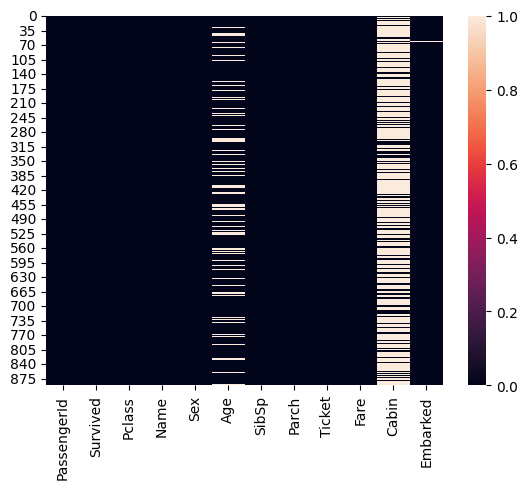

In [8]:
sns.heatmap(train.isnull())

## 2- Clean Data

In [9]:
''' 
Create a cleaning function for dataframes to 
1- Drop unwanted columns
2- Fill null Age data by median
3- Drop null values 
'''

def clean(df):
    df.drop([ 'Name', 'Ticket', 'Cabin', 'Embarked', 'Fare'], axis=1, inplace=True, errors='ignore')
    df['Age'] = df['Age'].fillna(df['Age'].median())
    df.dropna()

    return df

In [10]:
clean(train)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,male,22.0,1,0
1,2,1,1,female,38.0,1,0
2,3,1,3,female,26.0,0,0
3,4,1,1,female,35.0,1,0
4,5,0,3,male,35.0,0,0
...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0
887,888,1,1,female,19.0,0,0
888,889,0,3,female,28.0,1,2
889,890,1,1,male,26.0,0,0


## 3- Data Analysis

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 48.9+ KB


In [12]:
train['Sex'] = train['Sex'].replace(to_replace=['female', 'male'], value=[0,1])
test['Sex'] = test['Sex'].replace(to_replace=['female', 'male'], value=[0,1])
train_corr = train.corr()

<Axes: >

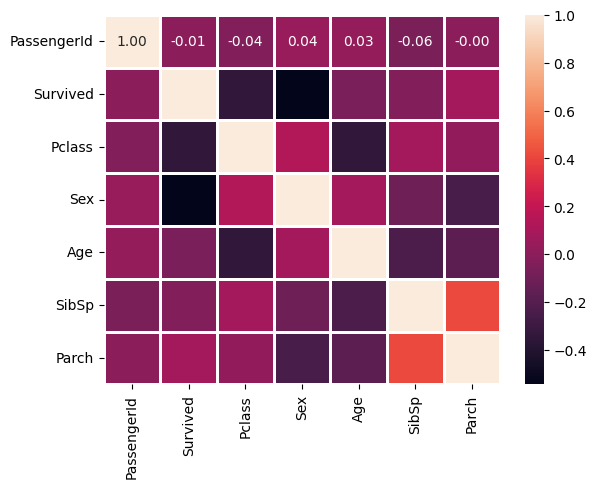

In [13]:
sns.heatmap(train_corr, annot = True, fmt='0.2f', linewidths=1)

In [14]:
train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [15]:
train['Sex'].value_counts()

Sex
1    577
0    314
Name: count, dtype: int64

<Axes: ylabel='count'>

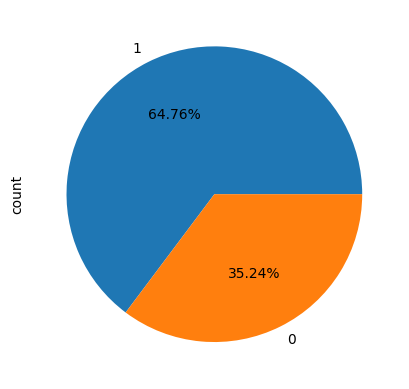

In [16]:
train['Sex'].value_counts().plot.pie(autopct = '%0.2f%%')

In [17]:
#sns.countplot(x=train['Sex'], hue=train['Survived'])

In [18]:
#sns.countplot(train.Pclass, hue=train.Survived)

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

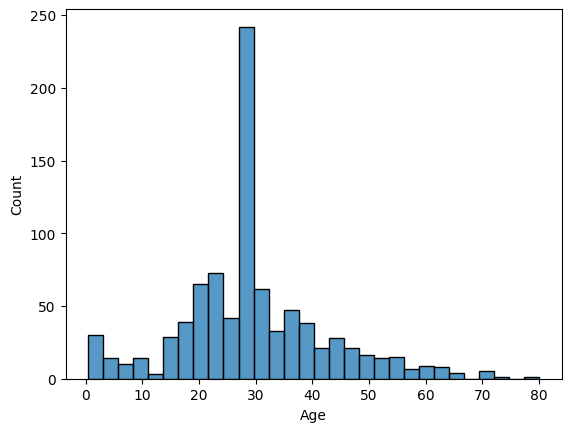

In [19]:
sns.histplot(train['Age'])

In [20]:
clean(test)

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 19.7 KB


In [21]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,1,22.0,1,0
1,2,1,1,0,38.0,1,0
2,3,1,3,0,26.0,0,0
3,4,1,1,0,35.0,1,0
4,5,0,3,1,35.0,0,0
...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0
887,888,1,1,0,19.0,0,0
888,889,0,3,0,28.0,1,2
889,890,1,1,1,26.0,0,0


## 4- Modeling

In [22]:
x = train.drop(['Survived'], axis=1)
y = train['Survived']

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y , train_size=0.8, shuffle=True)

In [24]:
model1 = DecisionTreeClassifier()
model1.fit(x_train, y_train)

DecisionTreeClassifier()

In [25]:
perd = model1.predict(x_test)

accuracy = accuracy_score(perd, y_test)
accuracy

0.6703910614525139

In [26]:
results = []

In [27]:
def accure(model):
    model.fit(x_train, y_train)
    perd = model.predict(x_test)
    accuracy = accuracy_score(y_test, perd)
    print('The Accuracy of ', model ,'is: ',f'{accuracy:0.3}')
    results.append(accuracy)


## 5- Evaluate Models

In [28]:
model1 = LogisticRegression()
accure(model1)

The Accuracy of  LogisticRegression() is:  0.732


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
model2 = RandomForestClassifier()
accure(model2)

The Accuracy of  RandomForestClassifier() is:  0.771


In [30]:
model3 = GradientBoostingClassifier()
accure(model3)

The Accuracy of  GradientBoostingClassifier() is:  0.782


In [31]:
model4 = DecisionTreeClassifier()
accure(model4)

The Accuracy of  DecisionTreeClassifier() is:  0.698


In [32]:
model5  = KNeighborsClassifier()
accure(model5)

The Accuracy of  KNeighborsClassifier() is:  0.503


In [33]:
model6  = GaussianNB()
accure(model6)

The Accuracy of  GaussianNB() is:  0.704


In [34]:
model7  = SVC()
accure(model7)

The Accuracy of  SVC() is:  0.575


In [35]:
algorithms = ['LinearRegression', 'RandomForestClassifier', 'GradientBoostingClassifier','DecisionTreeClassifier', 'KNeighborsClassifier', 'GaussianNB', 'SVC']

In [36]:
results

[0.7318435754189944,
 0.770949720670391,
 0.7821229050279329,
 0.6983240223463687,
 0.5027932960893855,
 0.7039106145251397,
 0.5754189944134078]

In [37]:
Algorithms_df = pd.DataFrame({'Algorithms':algorithms, 'Accuracy':results}) # Create DF for Models name and results
Algorithms_df

,Algorithms,Accuracy
0,LinearRegression,0.731844
1,RandomForestClassifier,0.770950
2,GradientBoostingClassifier,0.782123
3,DecisionTreeClassifier,0.698324
4,KNeighborsClassifier,0.502793
5,GaussianNB,0.703911
6,SVC,0.575419


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


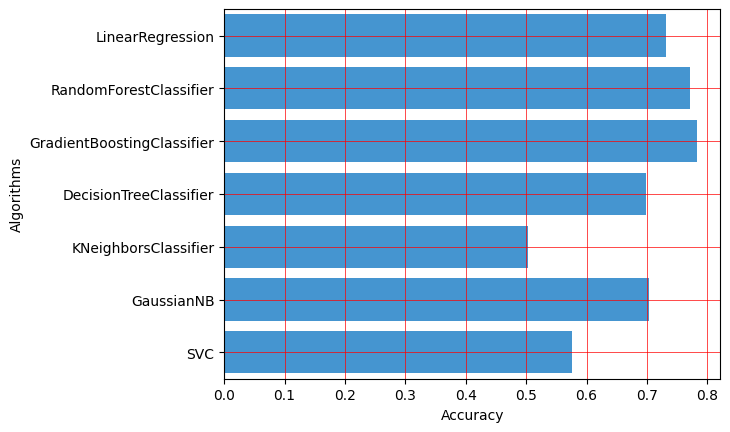

In [38]:
sns.barplot( data=Algorithms_df, y = 'Algorithms', x= 'Accuracy', color='#2E98E7')
plt.grid(color='r', linestyle='-', linewidth=0.5)

## 6- Use best model to predict test list

In [39]:
best_model = GradientBoostingClassifier()
best_model.fit(x_train, y_train)

GradientBoostingClassifier()

In [40]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,892,3,1,34.5,0,0
1,893,3,0,47.0,1,0
2,894,2,1,62.0,0,0
3,895,3,1,27.0,0,0
4,896,3,0,22.0,1,1
...,...,...,...,...,...,...
413,1305,3,1,27.0,0,0
414,1306,1,0,39.0,0,0
415,1307,3,1,38.5,0,0
416,1308,3,1,27.0,0,0


In [41]:
actule_pred = best_model.predict(test)

final = test['PassengerId']

In [42]:
prediction_df = pd.DataFrame({'PassengerId':final, 'Surviving_pred':actule_pred})

## 7- Upload data to kaggle

In [43]:
prediction_df.to_csv('submission.csv', index=False)

8- Additional Model

In [45]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model_z01 = LinearDiscriminantAnalysis()
accure(model_z01)

The Accuracy of  LinearDiscriminantAnalysis() is:  0.743
